# Trade with Python through MetaTrader5

In [6]:
# documentation: https://www.mql5.com/en/docs/integration/python_metatrader5

import MetaTrader5 as mt  # pip install MetaTrader5
import pandas as pd  # pip install pandas
from datetime import datetime

In [7]:
# start the platform with initialize()
mt.initialize()

True

In [8]:
# login to Trade Account with login()
# make sure that trade server is enabled in MT5 client terminal

login = 97070354
password = 'iIeElL0176_md.'
server = 'XMGlobal-MT5 5'

mt.login(login, password, server)



True

In [9]:
# get account info
account_info = mt.account_info()
print(account_info)

# getting specific account data
login_number = account_info.login
balance = account_info.balance
equity = account_info.equity

print()
print('login: ', login_number)
print('balance: ', balance)
print('equity: ', equity)

AccountInfo(login=97070354, trade_mode=0, leverage=1000, limit_orders=300, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=1000.0, credit=0.0, profit=0.0, equity=1000.0, margin=0.0, margin_free=1000.0, margin_level=0.0, margin_so_call=50.0, margin_so_so=20.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Demo Account', server='XMGlobal-MT5 5', currency='USD', company='XM Global Limited')

login:  97070354
balance:  1000.0
equity:  1000.0


In [10]:
request = {
        "action":mt.TRADE_ACTION_DEAL,
        "symbol":'EURUSD',
        "type" : mt.ORDER_TYPE_BUY,
        "price": mt.symbol_info_tick("EURUSD").ask,
        "volume":0.01,
        "deviation": 200,
        "comment":'Test_code',
        "type_filling":mt.ORDER_FILLING_IOC
}

mt.order_send(request)

OrderSendResult(retcode=10027, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='AutoTrading disabled by client', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=0.01, price=1.07735, stoplimit=0.0, sl=0.0, tp=0.0, deviation=200, type=0, type_filling=1, type_time=0, expiration=0, comment='Test_code', position=0, position_by=0))

In [11]:
# get number of symbols with symbols_total()
num_symbols = mt.symbols_total()

num_symbols

1478

In [7]:
# get all symbols and their specifications
symbols = mt.symbols_get()
symbols

(SymbolInfo(custom=False, chart_mode=0, select=True, visible=True, session_deals=0, session_buy_orders=0, session_sell_orders=0, volume=0, volumehigh=0, volumelow=0, time=1687449440, digits=5, spread=0, spread_float=True, ticks_bookdepth=10, trade_calc_mode=0, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=1, swap_mode=1, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=15, filling_mode=1, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=1.09845, bidhigh=1.10122, bidlow=1.0979700000000001, ask=1.09845, askhigh=1.10129, asklow=1.0979700000000001, last=0.0, lasthigh=0.0, lastlow=0.0, volume_real=0.0, volumehigh_real=0.0, volumelow_real=0.0, option_strike=0.0, point=1e-05, trade_tick_value=1.0, trade_tick_value_profit=1.0, trade_tick_value_loss=1.0, trade_tick_size=1e-05, trade_contract_size=100000.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=0.01, vo

In [8]:
# get symbol specifications
symbol_info = mt.symbol_info("EURUSD")._asdict()
symbol_info

{'custom': False,
 'chart_mode': 0,
 'select': True,
 'visible': True,
 'session_deals': 0,
 'session_buy_orders': 0,
 'session_sell_orders': 0,
 'volume': 0,
 'volumehigh': 0,
 'volumelow': 0,
 'time': 1687449452,
 'digits': 5,
 'spread': 0,
 'spread_float': True,
 'ticks_bookdepth': 10,
 'trade_calc_mode': 0,
 'trade_mode': 4,
 'start_time': 0,
 'expiration_time': 0,
 'trade_stops_level': 0,
 'trade_freeze_level': 0,
 'trade_exemode': 1,
 'swap_mode': 1,
 'swap_rollover3days': 3,
 'margin_hedged_use_leg': False,
 'expiration_mode': 15,
 'filling_mode': 1,
 'order_mode': 127,
 'order_gtc_mode': 0,
 'option_mode': 0,
 'option_right': 0,
 'bid': 1.09845,
 'bidhigh': 1.10122,
 'bidlow': 1.0979700000000001,
 'ask': 1.09845,
 'askhigh': 1.10129,
 'asklow': 1.0979700000000001,
 'last': 0.0,
 'lasthigh': 0.0,
 'lastlow': 0.0,
 'volume_real': 0.0,
 'volumehigh_real': 0.0,
 'volumelow_real': 0.0,
 'option_strike': 0.0,
 'point': 1e-05,
 'trade_tick_value': 1.0,
 'trade_tick_value_profit': 1.0,

In [12]:
# get current symbol price
symbol_price = mt.symbol_info_tick("EURUSD")._asdict()
symbol_price

{'time': 1715385477,
 'bid': 1.0768,
 'ask': 1.07735,
 'last': 0.0,
 'volume': 0,
 'time_msc': 1715385477624,
 'flags': 6,
 'volume_real': 0.0}

In [15]:
# ohlc_data
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_D1, 
                                             datetime(2021, 1, 1), 
                                             datetime.now()))

fig = px.line(ohlc_data, x=ohlc_data['time'], y=ohlc_data['close'])
fig.show()



In [13]:
# ohlc_data
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_H4, 
                                             datetime(2015, 1, 1), 
                                             datetime.now()))

ohlc_data.to_csv('D1_EURUSD_2015.csv')
# ohlc_data
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_D1, 
                                             datetime(2015, 1, 1), 
                                             datetime.now()))
ohlc_data.to_csv('D1_EURUSD_2015.csv')
# ohlc_data
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_M130, 
                                             datetime(2015, 1, 1), 
                                             datetime.now()))
ohlc_data.to_csv('M30_EURUSD_2015.csv')
# ohlc_data
ohlc_data = pd.DataFrame(mt.copy_rates_range("EURUSD", 
                                             mt.TIMEFRAME_H4, 
                                             datetime(2015, 1, 1), 
                                             datetime.now()))
ohlc_data.to_csv('H4_EURUSD_2015.csv')

In [14]:
ohlc_data.to_csv('H4_EURUSD_2015.csv')

<Axes: >

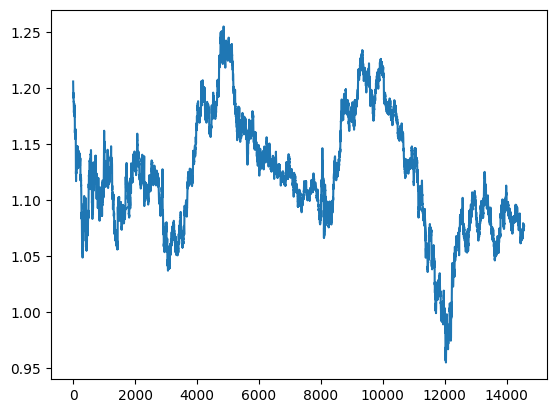

In [15]:
ohlc_data.close.plot()

In [17]:
ohlc_data

,time,open,high,low,close,tick_volume,spread,real_volume
0,1420185600,1.20481,1.20689,1.20341,1.20573,13573,17,0
1,1420200000,1.20573,1.20576,1.20248,1.20303,11302,17,0
2,1420214400,1.20302,1.20329,1.20031,1.20090,16214,17,0
3,1420228800,1.20093,1.20149,1.19993,1.20002,5820,17,0
4,1420416000,1.19511,1.19754,1.18599,1.19539,15220,17,0
...,...,...,...,...,...,...,...,...
14561,1715313600,1.07783,1.07817,1.07721,1.07730,3353,18,0
14562,1715328000,1.07729,1.07858,1.07706,1.07797,8836,18,0
14563,1715342400,1.07800,1.07852,1.07653,1.07691,9909,18,0
14564,1715356800,1.07695,1.07891,1.07594,1.07749,14820,18,0


In [12]:
# requesting tick data
tick_data = pd.DataFrame(mt.copy_ticks_range("EURUSD", 
                                             datetime(2023, 10, 4), 
                                             datetime.now(), 
                                             mt.COPY_TICKS_ALL))

fig = px.line(tick_data, x=tick_data['time'], y=[tick_data['bid'], tick_data['ask']])
fig.show()

# tick_data

ValueError: Cannot accept list of column references or list of columns for both `x` and `y`.

In [39]:
# total number of orders
num_orders = mt.orders_total()
num_orders

0

In [38]:
# list of orders
orders = mt.orders_get()
orders

()

In [37]:
# total number of positions
num_positions = mt.positions_total()
num_positions

0

In [95]:
# list of positions
positions = mt.positions_get()
positions

()

In [106]:
# number of history orders
num_order_history = mt.history_orders_total(datetime(2021, 1, 1), datetime(2021, 10, 6))
num_order_history

0

In [97]:
# list of history orders
order_history = mt.history_orders_get(datetime(2021, 1, 1), datetime(2021, 10, 6))
order_history

()

In [98]:
# number of history deals
num_deal_history = mt.history_deals_total(datetime(2021, 1, 1),  datetime(2021, 10, 6))
num_deal_history

0

In [99]:
# number of history deals
deal_history = mt.history_deals_get(datetime(2021, 1, 1), datetime(2021, 10, 6))
deal_history

()

In [100]:
# send order to the market
# documentation: https://www.mql5.com/en/docs/integration/python_metatrader5/mt5ordersend_py

request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": "EURUSD",
    "volume": 0.01, # FLOAT
    "type": mt.ORDER_TYPE_SELL,
    "price": mt.symbol_info_tick("EURUSD").ask,
    "sl": 0.0, # FLOAT
    "tp": 0.0, # FLOAT
    "deviation": 20, # INTERGER
    "magic": 234000, # INTERGER
    "comment": "python script open",
    "type_time": mt.ORDER_TIME_GTC,
    "type_filling": mt.ORDER_FILLING_IOC,
}

order = mt.order_send(request)
print(order)

OrderSendResult(retcode=10030, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Unsupported filling mode', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=234000, order=0, symbol='EURUSD', volume=0.01, price=1.09109, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=1, type_time=0, expiration=0, comment='python script open', position=0, position_by=0))


In [68]:
# close position

request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": "EURUSD",
    "volume": 2.0, # FLOAT
    "type": mt.ORDER_TYPE_SELL,
    "position": 158631228, # select the position you want to close
    "price": mt.symbol_info_tick("EURUSD").ask,
    "sl": 0.0, # FLOAT
    "tp": 0.0, # FLOAT
    "deviation": 20, # INTERGER
    "magic": 234000, # INTERGER
    "comment": "python script open",
    "type_time": mt.ORDER_TIME_GTC,
    "type_filling": mt.ORDER_FILLING_IOC,
}

order = mt.order_send(request)
print(order)

OrderSendResult(retcode=10013, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Invalid request', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=234000, order=0, symbol='EURUSD', volume=2.0, price=1.09128, stoplimit=0.0, sl=0.0, tp=0.0, deviation=20, type=1, type_filling=1, type_time=0, expiration=0, comment='python script open', position=158631228, position_by=0))


In [60]:
rates = mt.copy_rates_from_pos('EURUSD', mt.TIMEFRAME_M5, 0, 864)  
rates_frame = pd.DataFrame(rates)
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
max_value = rates_frame['high'].max() #The highest value reached by the price
min_value = rates_frame['low'].min() #The minimum value reached by the prices

In [114]:
request = {
        "action":mt.TRADE_ACTION_PENDING,
        "symbol":'EURUSD',
        "type" : mt.ORDER_TYPE_BUY_LIMIT,
        "price": min_value,
        "volume":1.0,
        "comment":'Test_code',
        "type_filling":mt.ORDER_FILLING_IOC
}

mt.order_send(request)



OrderSendResult(retcode=10009, deal=0, order=19477097, volume=1.0, price=0.0, bid=0.0, ask=0.0, comment='Request executed', request_id=2131559406, retcode_external=0, request=TradeRequest(action=5, magic=0, order=0, symbol='EURUSD', volume=1.0, price=1.08918, stoplimit=0.0, sl=0.0, tp=0.0, deviation=0, type=2, type_filling=1, type_time=0, expiration=0, comment='Test_code', position=0, position_by=0))

In [83]:
symbol = "EURUSD"
lot = 0.1
point = mt.symbol_info(symbol).point
price = mt.symbol_info_tick(symbol).ask

In [86]:
price

1.09125

In [108]:
symbol = 'EURUSD'
lot = 0.1
point = mt.symbol_info(symbol).point
price = mt.symbol_info_tick(symbol).ask
deviation = 20
request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt.ORDER_TYPE_BUY,
    "price": price,
    "sl": price - 100 * point,
    "tp": price + 100 * point,
    "deviation": deviation,
    "magic": 234000,
    "comment": "python script open",
    "type_time": mt.ORDER_TIME_GTC,
    "type_filling": mt.ORDER_FILLING_IOC,
}
mt.order_send(request)

OrderSendResult(retcode=10030, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Unsupported filling mode', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=234000, order=0, symbol='EURUSD', volume=0.1, price=1.09273, stoplimit=0.0, sl=1.09173, tp=1.0937299999999999, deviation=20, type=0, type_filling=1, type_time=0, expiration=0, comment='python script open', position=0, position_by=0))

In [109]:
# Place buy order

# Initialization value
symbol = "EURUSD"
lot = 0.01

# Choose the deviation
deviation = 10

# Find the filling mode of symbol
filling_type = mt.symbol_info(symbol).filling_mode

# Create dictionnary request
request = {
    "action": mt.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": lot,
    "type": mt.ORDER_TYPE_BUY,
    "price": mt.symbol_info_tick(symbol).ask,
    "deviation": deviation,
    "type_filling": filling_type,
    "type_time": mt.ORDER_TIME_GTC
}


mt.order_check(request)

OrderCheckResult(retcode=10030, balance=0.0, equity=0.0, profit=0.0, margin=0.0, margin_free=0.0, margin_level=0.0, comment='Unsupported filling mode', request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=0.01, price=1.09283, stoplimit=0.0, sl=0.0, tp=0.0, deviation=10, type=0, type_filling=1, type_time=0, expiration=0, comment='', position=0, position_by=0))

In [113]:
    sell_order = {
        "action": mt.TRADE_ACTION_DEAL,
        "symbol": symbol,
        "volume": lot,
        "type": mt.ORDER_TYPE_SELL,
#         "price": ask,
#         "sl": ask + sl_short * point,
#         "tp": ask - take_profit_short * point,
#         "deviation": deviation,
#         "magic": magic,
        "comment": "python short",
        "type_time": mt.ORDER_TIME_GTC,
        "type_filling": mt.ORDER_FILLING_IOC,
        }
    mt.order_check(request)

OrderCheckResult(retcode=10030, balance=0.0, equity=0.0, profit=0.0, margin=0.0, margin_free=0.0, margin_level=0.0, comment='Unsupported filling mode', request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=0.01, price=1.09283, stoplimit=0.0, sl=0.0, tp=0.0, deviation=10, type=0, type_filling=1, type_time=0, expiration=0, comment='', position=0, position_by=0))

In [115]:
mt.symbol_info_tick("EURUSD").ask


1.09293

In [118]:
request = {
        "action":mt.TRADE_ACTION_DEAL,
        "symbol":'EURUSD',
        "type" : mt.ORDER_TYPE_BUY,
        "price": mt.symbol_info_tick("EURUSD").ask,
        "volume":1.0,
        "deviation": 200,
        "comment":'Test_code',
        "type_filling":mt.ORDER_FILLING_IOC
}

mt.order_send(request)

OrderSendResult(retcode=10030, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Unsupported filling mode', request_id=0, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='EURUSD', volume=1.0, price=1.09287, stoplimit=0.0, sl=0.0, tp=0.0, deviation=200, type=0, type_filling=1, type_time=0, expiration=0, comment='Test_code', position=0, position_by=0))